# Математические пакеты. Лабораторная работа 2

Выполнил студент группы 9381 Аухадиев Александр.

## Цель работы

Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Данные для работы

1. Средствами ОС Windows записать свой речевой сигнал.
2. Фраза — Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных технологий и информатики.
3. Формат записи— моно-сигнал, 16000 гц или 22000 гц, без сжатия (wav-формат).

## Ресурсы

1. Открытая библиотека OpenSMILE, содержащая богатый набор алгоритмов для анализа речи и музыкальных сигналов: https://www.audeering.com/opensmile/.
2. Библиотека Librosa: https://librosa.org/doc/latest/index.html. Пример работы: https://nuancesprog.ru/p/6713/

## Задачи 

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

## Теоретические положения

### Частота основного тона и форманты

#### Основной тон

Частотой основного тона ($F_0$) называют частоту вибрации голосовых связок. У каждого говорящего базовая частота основного тона индивидуальна и обусловлена особенностями строения гортани. Частота основного тона различна для мужских (примерный диапазон 
80− 200 Hz) и женских (примерный диапазон: 160− 350 Hz) голосов.

#### Форманты

Акустические резонансы в голосовом тракте создают пики в огибающей спектра звука. Такие пики называются формантами. Частота основного тона является первой формантой, далее идут вторая, третья и четвертая форматны: $F_1, F_2, F_3$. Амплитуда каждой последующей форманты ниже, чем предыдущей, а их частоты примерно равны частоте основного тона умноженного на целое число:
$F_1 \approx 2 F_0, F_2 \approx 3 F_0, F_3 \approx 4 F_0$.

### Сонограмма

Сонограма— это изображение кратковременного спектра сигнала (спектров на последовательности кадров) в координатах времени (горизонтальная ось), частоты (вертикальная ось) и энергии голоса (степень зачернения, цвет). Интенсивность темного (или цвета) отображает амплитуду спектра. Наиболее темные горизонтальные полосы частот показывают спектральные максимумы.

### Дискретное преобразование Фурье

#### Модель сигнала

Сигнал – последовательность комплексных чисел $x = \{x_j\}_{j=0}^{N-1}$, продолженная периодически на все целые индексы, то есть $x_{j+sN} = x_j$ для любого $s \in \mathbb {Z}$. Множество сигналов будем обозначать $ \mathbb {C}_N$.  

Единичный N-периодический импульс – сигнал $\delta _N$   
$\delta _N (j) =
  \begin{cases}
    1       & \quad \text{когда } j \text{ делится на} N,\\
    0       & \quad \text{в остальных случаях}
  \end{cases}
$  

Лемма:  
Для любого сигнала х справедливо равенство: $x(j) = \sum\limits_{k=0}^{N-1}{x(k) \delta _N (j-k), j \in \mathbb {Z}}$  

#### Ортонормированный базис сдвигов единичного импульса

Введем в $\mathbb {C}_N$ скалярное произведение и норму: $\langle x,y \rangle = \sum\limits_{j=0}^{N-1}{x(j) \bar{y}(j)}, \|x \| = \sqrt{\langle x,x \rangle}$  
Два сигнала x и y называются ортогональными, если $\langle x,y \rangle = 0$. Сигнал называется нормированным, если $\|x \| = 0$  
Система сдвигов единичного импульса $\delta _N (j), \delta _N (j-1), ..., \delta _N (j-1+N)$ образует ортонормированный базис в пространстве сигналов $\mathbb {C} _N$  

#### Дискретное преобразование Фурье

Обозначим корень N-й степени из единицы, как $\omega _N$: $\omega _N = \cos{{2 \pi} \over {N}} + i \sin{{2 \pi} \over {N}} = e^{i {{2 \pi} \over {N}}}$  

Тогда дискретное преобразование Фурье (сокращенно ДПФ) это отображение $\mathbb {F} _N : \mathbb {C} _N \to \mathbb {C} _N$, , сопоставляющее сигналу x сигнал X со значениями:  

$X(k) = \sum\limits_{j=0}^{N-1}{x(j) \omega _N ^{-kj}}, k \in \mathbb {Z}$ (1)  

Сигнал Х называется спектром Фурье сигнала или просто спектром, а величины Х(k) — компонентами спектра или спектральными составляющими.

#### Обратное ДПФ

Для (1) справедлива формула обращения: $x(j) = {1 \over N} \sum\limits_{k=0}^{N-1}{X(k) \omega _N ^{kj}}, j \in \mathbb {Z}$ (2) - обратное дискретное преобразование Фурье  

#### Экспоненциальный базис

Введем обозначение $u_k (j) = \omega _N ^{kj}$. Тогда формула обращения для ДПФ — (2) примет вид $x(j) = {1 \over N} \sum\limits_{k=0}^{N-1}{X(k) u_k (j)}$, то есть сигнал $x(j)$ раскладывается по системе сигналов $u_{0}(j),u_{1}(j),...,u_{N-1}(j)$ (4). Коэффициентами в этом разложении являются компоненты спектра.

Лемма: Система сигналов (4) является ортогональной. При этом $\|u_k\|^2 = N$ при всех $k \in 0 : N-1$  

Таким образом, система (4) образует ортогональный базис в пространстве $\mathbb {C}$ . Этот базис называется экспоненциальным.

## Выполнение работы
  
### Загрузка аудио сигнала и построение огибающей  
  


In [25]:
#Импорт необходимых пакетов, считывание и проигрывание аудио-файла

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import wave
import math
import more_itertools as mi

audio_file = 'my_voice.wav'
ipd.Audio(audio_file)

In [26]:
wav_read = wave.open(audio_file, mode="r") #Объект для чтения wav-файла
# Считываем число каналов, число байт на сэмпл, частота дискретизации, общее число фреймов, тип сжатия, имя типа сжатия
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav_read.getparams() 
content = wav_read.readframes(nframes) # считывание фреймов

#сопоставлены размеры сэмпла и типы данных numpy
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}
# Параметр sampwidth определяет, сколько байт уходит на кодирование одного сэмпла
content = np.fromstring(content, dtype=types[sampwidth]) #создает одномерный массив из байтовой строки

length = nframes / framerate #Длительность потока в секундах
time_array = np.linspace(0, len(content) / framerate, num=len(content)) #равномерное распределение фрэймов по времени
print(nchannels, sampwidth, framerate, nframes, comptype, compname, length, sep="\n")

1
2
16000
129200
NONE
not compressed
8.075


C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_5608/1128418227.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content = np.fromstring(content, dtype=types[sampwidth]) #создает одномерный массив из байтовой строки


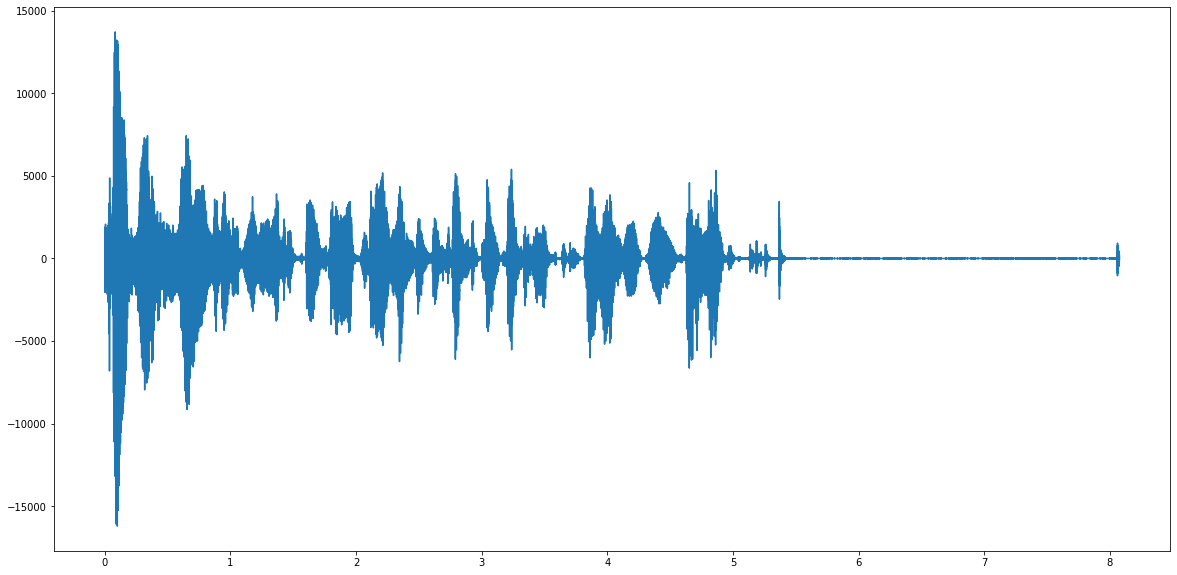

In [27]:
time = np.linspace(0., length, nframes)
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(time, content)

### Построение траектории основного тона с помощью ДПФ

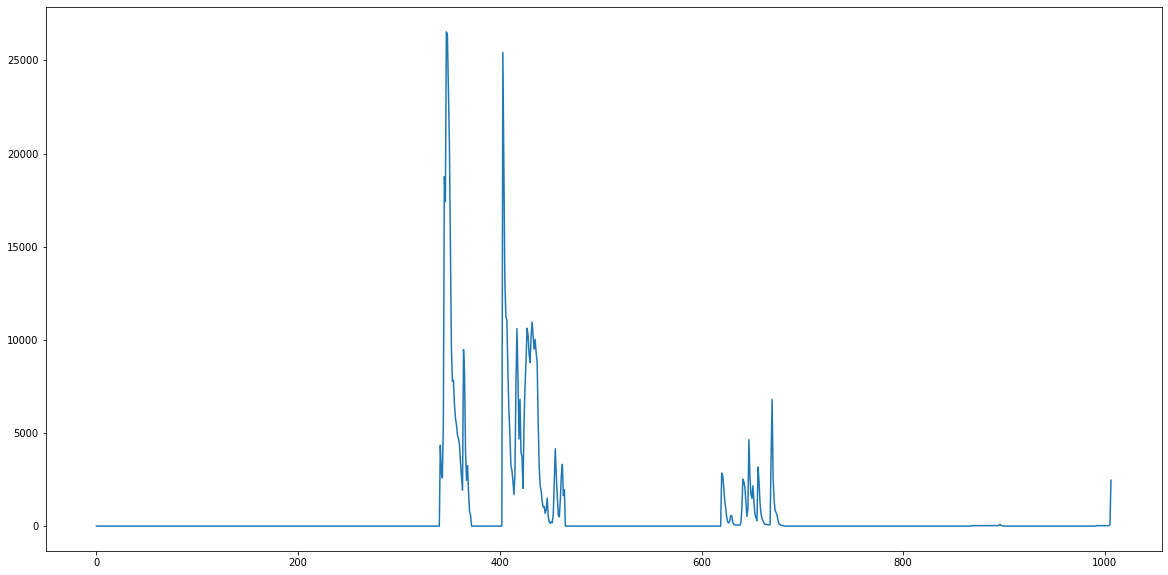

In [28]:
dimension = 512 #размерность фурье
spectral_resolution = int(framerate / dimension) #спектральное резрешение

def DFT(signal):
    X = []
    wn = np.exp(2 * np.pi / len(signal))
    for k in range(len(signal)):
        X.append(np.sum([signal[j] * (wn ** (-k * j)) for j in range(0, len(signal))]))
    return X

segments = list(mi.windowed(content, n=dimension, step=int(0.25*dimension)))
segments[-1] = list(filter(lambda i: i != None, segments[-1]))
segments = [i * np.hamming(len(i)) for i in segments]

new_content = [i for i in segments[0]]

amplitude_spectrum = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in segments]
amplitude_spectrum = np.array([i.real for i in amplitude_spectrum])

def gen_chunks(arr, n):
    for i in range(0, len(arr), n):
        yield arr[i:i + n]
        
F0 = []
for i in gen_chunks(amplitude_spectrum, spectral_resolution):
    segment = np.array(i)
    if segment.max() > segment.mean() * 3:            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]
        
plt.plot(F0)

### Построение второй, третьей и четвертой формантных частот

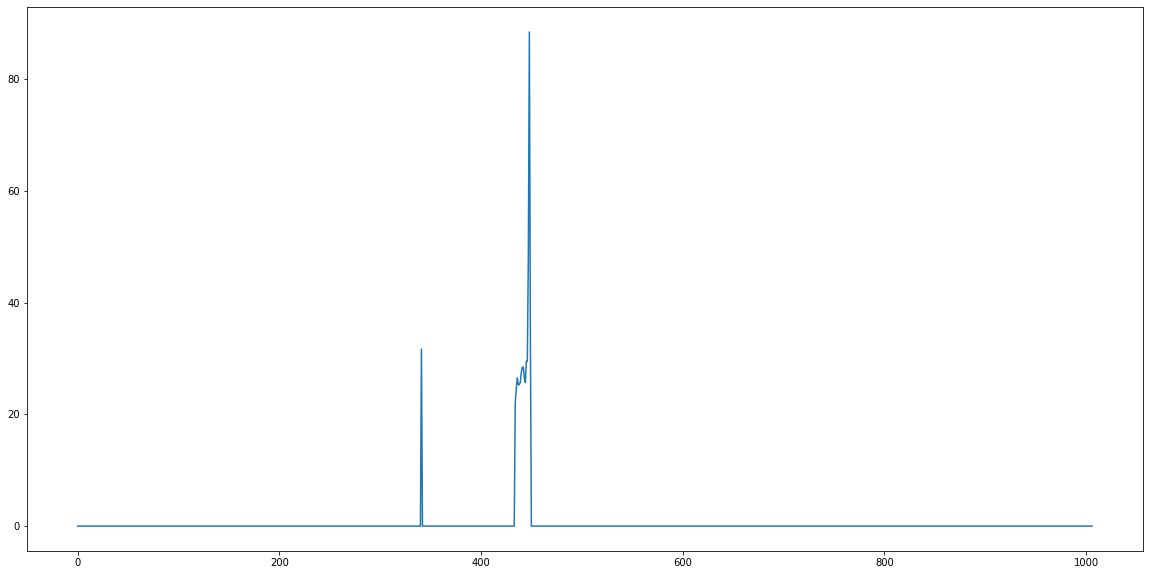

In [29]:
F1 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
        if F0[i] > 2*inter_max:           
            F1.append(inter_max)
        else:
            F1.append(0)
    except:
        F1.append(0)
    i += 1
    

plt.plot(F1)

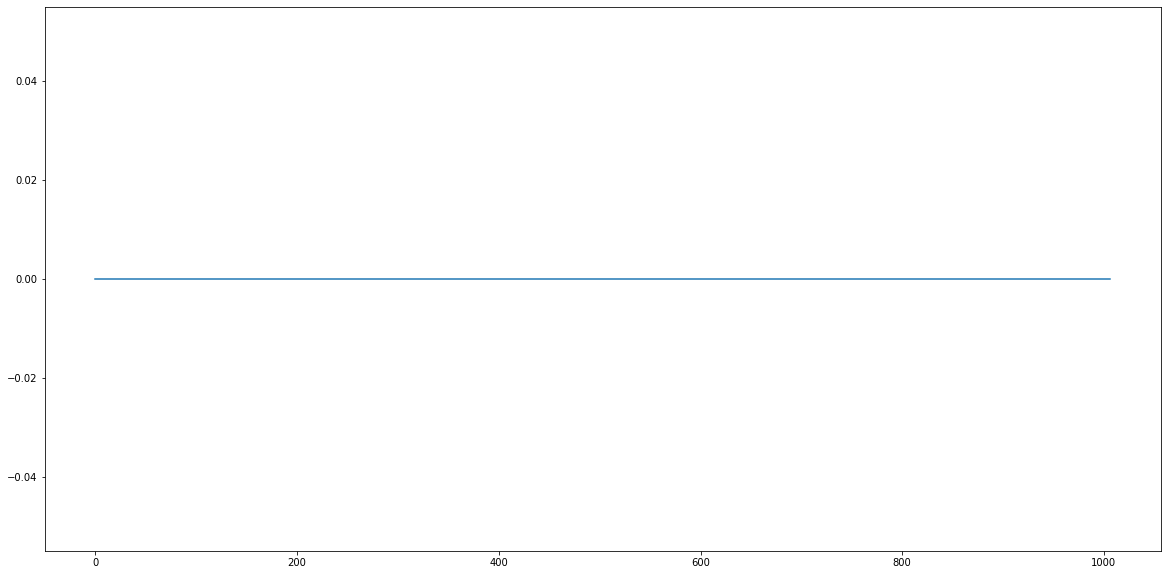

In [30]:
F2 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] > 4*inter_max:           
            F2.append(inter_max)
        else:
            F2.append(0)
    except:
        F2.append(0)
    i += 1
    

plt.plot(F2)

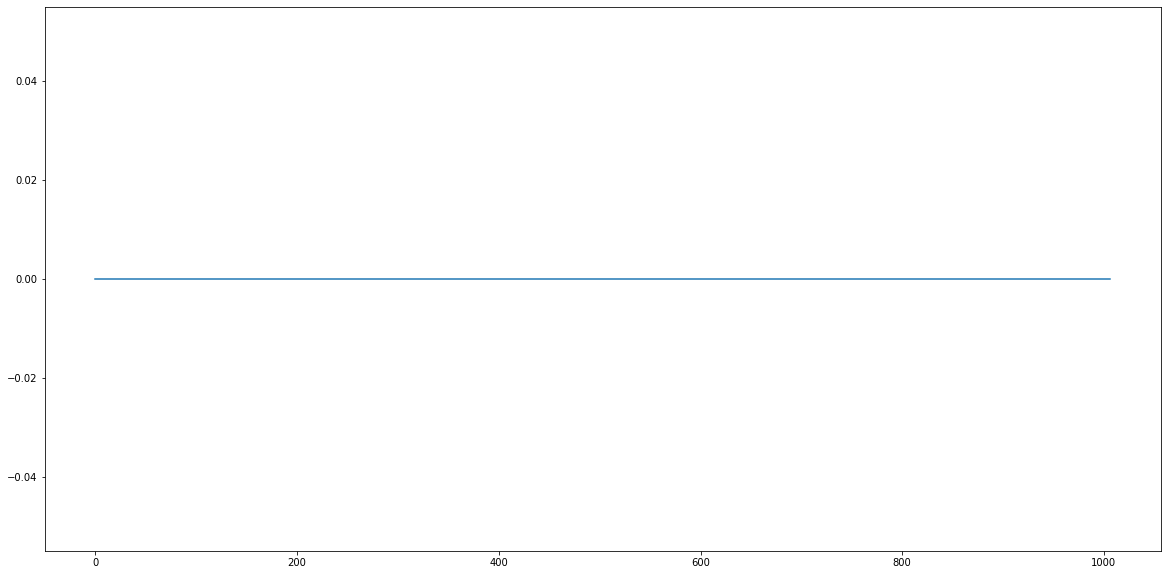

In [31]:
F3 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[4*i], F0[4*i-1], F0[4*i+1]])
        if F0[i] > 8*inter_max:           
            F3.append(inter_max)
        else:
            F3.append(0)
    except:
        F3.append(0)
    i += 1
    

plt.plot(F3)

### Построение сонограммы на записи голоса

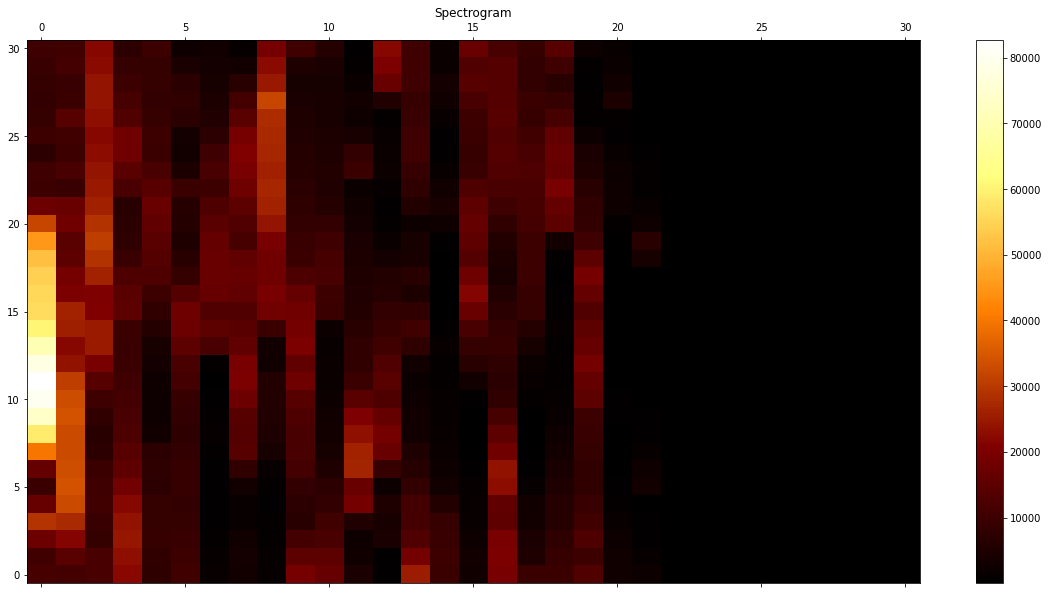

In [32]:
matrix_amp = []
for i in [amplitude_spectrum[k:k + spectral_resolution] for k in range(len(amplitude_spectrum) - 56)[::spectral_resolution]]:
    matrix_amp.append(i)

fig, ax = plt.subplots(nrows=1, ncols=1)
cax = ax.matshow(
    np.transpose(matrix_amp),
    interpolation="nearest",
    aspect="auto",
    cmap=plt.cm.afmhot,
    origin="lower",
)
fig.colorbar(cax)
plt.title("Spectrogram")
plt.show()

### Выводы
С помощью ДПФ была построена траектория основного тона (F0), траектории второй, третьей и четвертой формантных частот, а также сонограмма.